In [2]:
import os
import sys
import scipy.io as sio
import scipy.sparse as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlp
import re
import io
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

%matplotlib inline

from IPython.display import clear_output

In [28]:
# outfile = './output/zoo2_gcn_l3_mwis_training.out'
# outfile = './output/zoo4_gcn_l3_mwis_training.out'
# outfile = './output/train_MWISTwinTr_l3_foo.out'

outfile_dict = {
#     'ZOO2':    './output/zoo2_gcn_l3_mwis_training.out',
#     'ZOO11':   './output/zoo4_gcn_l3_mwis_training.out',
    'Twin_cent':    './output/ER_Graph_Uniform_GEN21_test1/c_Adam_lr5e-05_relu.out',
    'Twin_cent_ver2':    './output/ER_Graph_Uniform_GEN21_test1/c_Adam_lr5e-05_drop0.0_relu_ver2.out',
    'Twin_decent':    './output/ER_Graph_Uniform_GEN21_test1/d_Adam_lr5e-05_cons1_relu.out',
    'Twin_decent_ver2':    './output/ER_Graph_Uniform_GEN21_test1/d_Adam_lr5e-05_drop0.0_cons1_relu_ver2.out',
#     'Twin_decent_drop0.2':    './output/ER_Graph_Uniform_GEN21_test1/d_Adam_lr1e-05_drop0.2_cons1_relu.out',
}


In [29]:
def read_out_file(outfile):
    with open(outfile) as f:
        firstline = f.readline().rstrip()
    firstline = firstline.replace(": ",":")
    firstline

    header_text = firstline.split(":")
    header = []
    for htext in header_text:
        temp = htext.replace(" ", ",", 1)
        header.append(temp.split(",")[-1])
    header = header[0:-1]

    # with open(outfile) as f:
    #     text = f.read()
    text = ''
    with open(outfile) as f:
        for line in f:
            if not "Actor loaded " in line:
                text += line
    # print(text)
    #     text = f.read()

    for item in header:
        text = text.replace(item+":", ",")
    text = text.replace(" ","")
    textIO = io.StringIO(text)
    df = pd.read_csv(textIO, names=header, header=None, index_col=0)
    df.reset_index(drop=True, inplace=True)
    
    for item in ['Actor']:
        item_index = df['Model'] == item
        df_tmp = df[item_index].reset_index(drop=True)    
        df_tmp['Best_Ratio'] = df_tmp['Test_Ratio'].cummax()

    return df_tmp

In [30]:
# for item in ['Actor']:
#     item_index = df['Model'] == item
#     df_tmp = df[item_index].reset_index(drop=True)    
#     df_tmp['Best_Ratio'] = df_tmp['Test_Ratio'].cummax()
# df_tmp

In [33]:
samples_dict = {
#     'ZOO2': 2,
#     'ZOO11': 11,
        'Twin_cent': 1,
        'Twin_cent_ver2': 1,
        'Twin_decent': 1,
        'Twin_decent_ver2': 1,
    
}

label_dict = {
#     'ZOO2': 'ZOO-2 points',
#     'ZOO11': 'ZOO-11 points',
    'Twin_cent': 'Twin_cent',
    'Twin_cent_ver2': 'scheduler_centralized',
    'Twin_decent': 'Twin_decent',
    'Twin_decent_ver2': 'scheduler_distributed',
}

training_set_size=1100
# training_set_size = 5

df_mwis = pd.DataFrame([])
for key in outfile_dict:
    outfile = outfile_dict[key]
    df_tmp = read_out_file(outfile)
    df_tmp['sample'] = samples_dict[key]
    df_tmp['model'] = label_dict[key]
    df_mwis = pd.concat([df_mwis, df_tmp], axis=0, ignore_index=True)

df_mwis['calls'] = (df_mwis['Epoch']*training_set_size+df_mwis['ID'])*df_mwis['sample']
# df_mwis['calls'] = (df_mwis['Epoch']*training_set_size+df_mwis['ID']/20)*df_mwis['sample']
# df_mwis['calls'] = range(len(df_tmp))


In [34]:
# df_tmp = df_mwis[df_mwis['Model']=='Actor'].reset_index(drop=True)    
df_tmp = df_mwis.reset_index(drop=True)    

df_tmp1 = df_tmp.copy()
df_tmp2 = df_tmp.copy()
df_tmp1['ratio'] = df_tmp1['Train_Ratio']
df_tmp1['type'] = 'Training'
df_tmp2['ratio'] = df_tmp2['Test_Ratio']
df_tmp2['type'] = 'Validation'
df_tmp = pd.concat([df_tmp1,df_tmp2], axis=0, ignore_index=True)
df_tmp

,Epoch,ID,Model,Train_Ratio,Test_Ratio,Loss,Corr,L_Avg,Track,runtime,z_avg,Best_Ratio,sample,model,calls,ratio,type
0,0,100,Actor,0.9904,0.9841,-0.4947,0.0927,0.5354,1.9891,16.22,0.056,0.9841,1,Twin_cent,100,0.9904,Training
1,0,200,Actor,0.9264,0.9676,-0.4385,0.2578,0.4815,2.2066,19.01,0.012,0.9841,1,Twin_cent,200,0.9264,Training
2,0,300,Actor,0.8347,0.8077,-0.2044,0.2735,0.3650,3.9510,19.00,0.009,0.9841,1,Twin_cent,300,0.8347,Training
3,0,400,Actor,0.9728,0.9882,-0.1083,0.4510,0.3476,9.1257,18.74,0.062,0.9882,1,Twin_cent,400,0.9728,Training
4,0,500,Actor,1.0012,1.0061,-0.3912,0.4876,0.4205,2.5719,18.99,0.166,1.0061,1,Twin_cent,500,1.0012,Training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,4,700,Actor,1.0269,1.0373,-0.1551,0.5006,0.2759,6.6904,17.47,1.210,1.0474,1,scheduler_distributed,5100,1.0373,Validation
436,4,800,Actor,1.0160,1.0367,-0.2573,0.4932,0.2816,4.0298,17.41,1.217,1.0474,1,scheduler_distributed,5200,1.0367,Validation
437,4,900,Actor,1.0163,1.0412,-0.1325,0.4956,0.2954,7.8567,17.41,1.216,1.0474,1,scheduler_distributed,5300,1.0412,Validation
438,4,1000,Actor,1.0202,1.0418,-0.2459,0.4931,0.2798,4.2364,17.19,1.208,1.0474,1,scheduler_distributed,5400,1.0418,Validation


In [35]:
df_tmp['calls'] = df_tmp['calls']/100

/tmp/ipykernel_62797/1992401009.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="calls", y="ratio", hue="model", style='type',


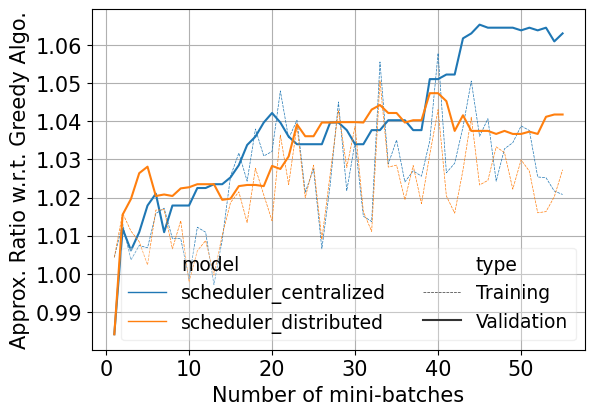

In [39]:
fig, ax = plt.subplots(1,1,sharey=True, figsize=(8, 6))
for item in ['Actor']:
    sns.lineplot(x="calls", y="ratio", hue="model", style='type', 
                 hue_order=[
#                     'Twin_cent',
                    'scheduler_centralized',
#                     'Twin_decent',
                    'scheduler_distributed',
                 ],
                 style_order=['Validation','Training'],
                 size='type',
                 sizes={'Validation':1.5,'Training':0.5},
                 data=df_tmp,
                 ci=None, ax=ax,
                 linewidth=1.0, markersize=10, 
                 palette="tab10", markers=False, dashes=True)
    
# ax.set_xlim([0, 40000])
# ax.set_xticks(np.arange(0,40000,5000))

ax.grid(True)
# ax.set_ylim([0.985, 1.075])
# ax.set_yticks(np.arange(0.99,1.07,0.01))
ax.set_xlabel("Number of mini-batches", fontsize=15)
ax.set_ylabel("Approx. Ratio w.r.t. Greedy Algo.", fontsize=15)

ax.legend(fontsize=13.5, framealpha=0.3, ncol=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.set_size_inches(5.8, 4)
fname='./output/scheduler_convergence.pdf'
# pp = PdfPages(fname)
plt.tight_layout(pad=0.15)
# plt.subplots_adjust(left=0.11, right=0.995, top=0.995, bottom=0.115)
plt.subplots_adjust(right=0.995)
fig.savefig(fname, dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format='pdf')

/tmp/ipykernel_150707/2524016849.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="calls", y="ratio", hue="train", style='type',


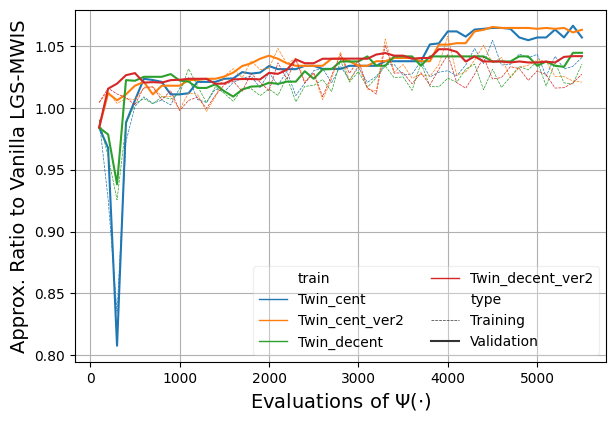

In [929]:
fig, ax = plt.subplots(1,1,sharey=True, figsize=(8, 6))
for item in ['Actor']:
    sns.lineplot(x="calls", y="ratio", hue="train", style='type', 
                 hue_order=[
                    'Twin_cent',
                    'Twin_cent_ver2',
                    'Twin_decent',
                    'Twin_decent_ver2',
                 ],
                 style_order=['Validation','Training'],
                 size='type',
                 sizes={'Validation':1.5,'Training':0.5},
                 data=df_tmp,
                 ci=None, ax=ax,
                 linewidth=1.0, markersize=10, 
                 palette="tab10", markers=False, dashes=True)
    
# ax.set_xlim([0, 40000])
# ax.set_xticks(np.arange(0,40000,5000))

ax.grid(True)
# ax.set_ylim([0.985, 1.075])
# ax.set_yticks(np.arange(0.99,1.07,0.01))
ax.set_xlabel("Evaluations of $\Psi(\cdot)$", fontsize=14)
ax.set_ylabel("Approx. Ratio to Vanilla LGS-MWIS", fontsize=14)

ax.legend(fontsize=10, framealpha=0.3, ncol=2)
fig.set_size_inches(6, 4)
fname='./output/twin_dropout.jpg'
# pp = PdfPages(fname)
plt.tight_layout(pad=0.1)
plt.subplots_adjust(left=0.11, right=0.995, top=0.995, bottom=0.115)
# fig.savefig(fname, dpi=300, facecolor='w', edgecolor='w', orientation='portrait', format='jpg')
